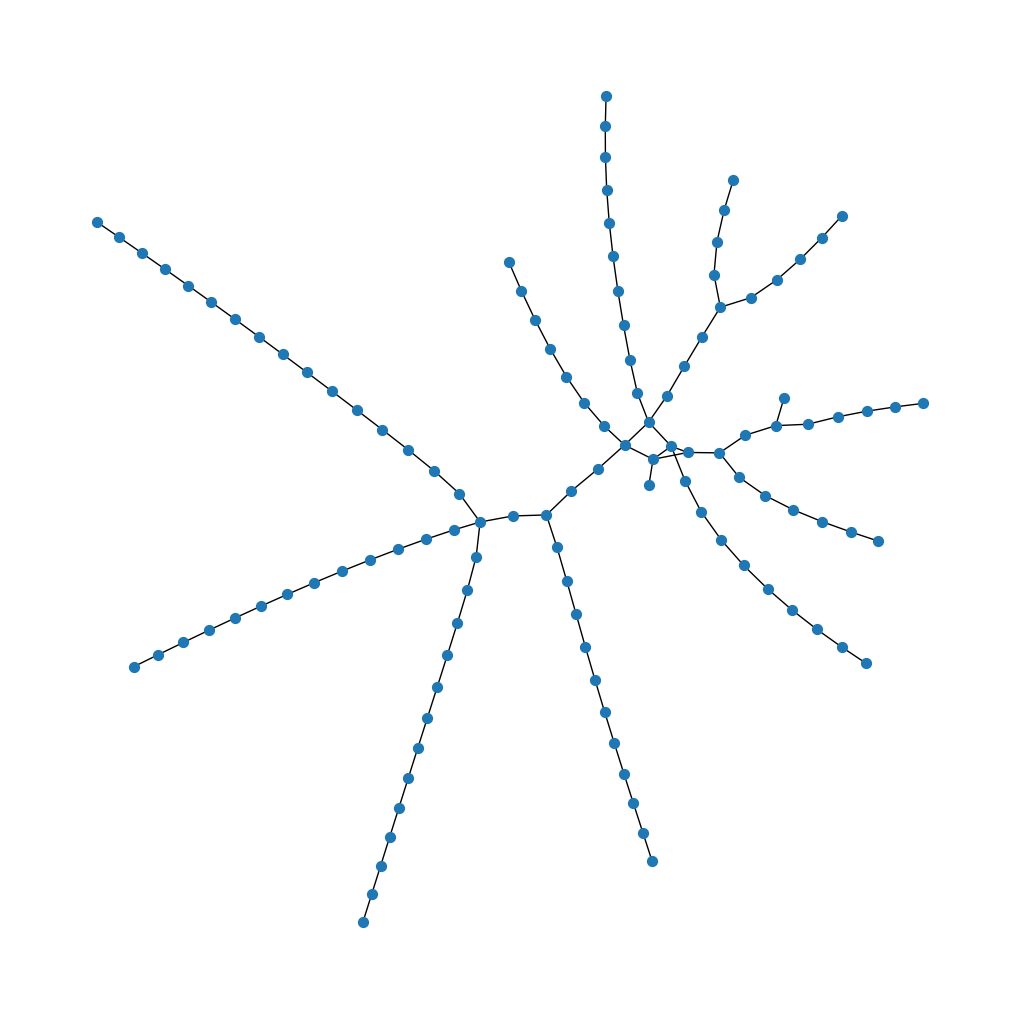

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def open_line_file(filename):
    with open(f'./lines_from_gtfs_static_data/{filename}.txt', 'r') as f:
      lines = f.readlines()
    return lines

line_files = [
    'Red-C1-0',
    'Red-C1-1',
    'Red-C2-0',
    'Red-C2-1',
    'Green-B-C1-0',
    'Green-B-C1-1',
    'Green-C-C1-0',
    'Green-C-C1-1',
    'Green-D-C1-0',
    'Green-D-C1-1',
    'Green-E-C1-0',
    'Green-E-C1-1',
    'Orange-C1-0',
    'Orange-C1-1',
    'Blue-C1-0',
    'Blue-C1-1'
]

line_stations = map(open_line_file, line_files)

stations = set()
edges = set()

for line in line_stations:
    for i in range(len(line)-1):
        stop_name = line[i].rstrip()
        next_stop_name = line[i+1].rstrip()
        stations.add(stop_name)
        edges.add((stop_name, next_stop_name))
    end_stop_name = line[-1].rstrip()
    stations.add(end_stop_name)

network = nx.Graph()
network.add_nodes_from(stations)
network.add_edges_from(edges)

fig = plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(network)
nx.draw(network, layout, node_size=50)

In [4]:
import json

delays_file = open("./delay_data/named_rapid_transit_delays.json", 'r')
delays_json = delays_file.read()
delays_file.close()

delays = json.loads(delays_json)
delays

nx.set_node_attributes(network, delays, "avg_delay")
nx.get_node_attributes(network, "avg_delay")

{'Tufts Medical Center': 95.1428571428571,
 'Savin Hill': -84180.0,
 'Riverside': 36.1666666666667,
 'Harvard Avenue': -341.8,
 'Hynes Convention Center': -140.6,
 'Gilman Square': -9638.22222222222,
 'Charles/MGH': 324.666666666667,
 'Wood Island': -60.75,
 'Malden Center': 95.0,
 'Park Street': -410.0,
 'JFK/UMass': -42897.75,
 'Washington Street': -360.8,
 'Chestnut Hill Avenue': -352.833333333333,
 'South Station': -13883.3333333333,
 'Green Street': -17129.1,
 'Braintree': -86290.0,
 'Assembly': 70.1666666666667,
 'Maverick': -99.75,
 'Amory Street': -274.0,
 'Downtown Crossing': 123.142857142857,
 'Oak Grove': -42099.25,
 'Boston College': -338.5,
 'Kendall/MIT': 277.666666666667,
 'Northeastern University': -1108.33333333333,
 'East Somerville': -10859.75,
 'Tappan Street': 52.0,
 'Quincy Center': -87075.0,
 'Saint Paul Street': 68.0,
 'Blandford Street': -205.0,
 'Harvard': 429.6,
 'Hawes Street': 96.0,
 'Brandon Hall': 34.0,
 'Woodland': -50.8,
 'Riverway': -884.0,
 'Copley': 

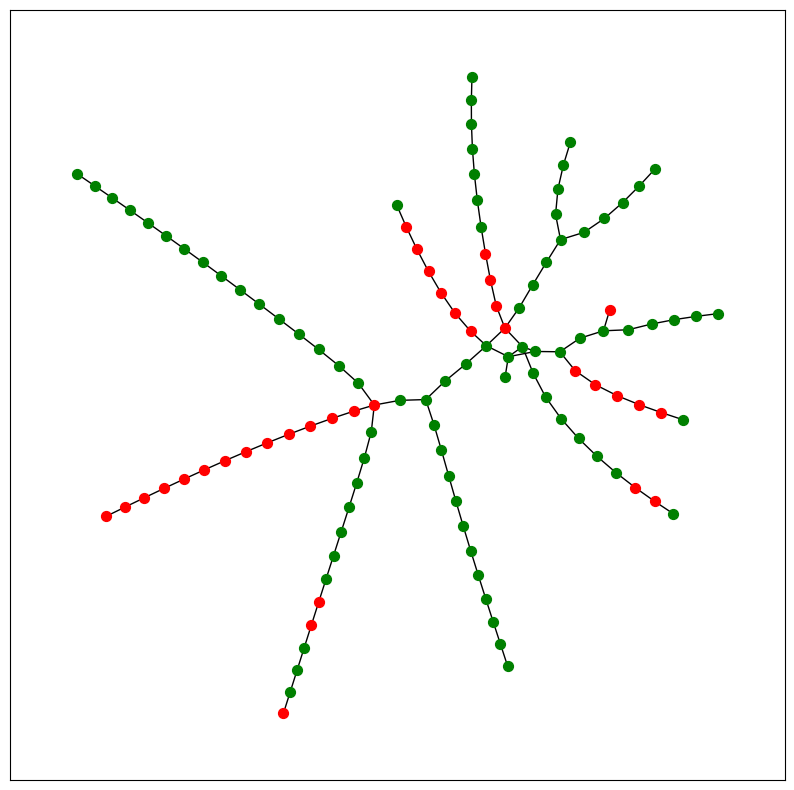

In [5]:
# proof of concept for coloring nodes; for now just split into positive and negative delays
# later we can split into bins
nonnegative_delay_nodes = [n for (n, delay) in nx.get_node_attributes(network, "avg_delay").items() if delay >= 0]
negative_delay_nodes = [n for (n, delay) in nx.get_node_attributes(network, "avg_delay").items() if delay < 0]
remaining_nodes = list(set(network.nodes()) - set(nonnegative_delay_nodes) - set(negative_delay_nodes))

fig = plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(network)
nx.draw_networkx_nodes(network, layout, nodelist=nonnegative_delay_nodes, node_color='red', node_size=50)
nx.draw_networkx_nodes(network, layout, nodelist=negative_delay_nodes, node_color='green', node_size=50)
nx.draw_networkx_nodes(network, layout, nodelist=remaining_nodes, node_color='blue', node_size=50)
nx.draw_networkx_edges(network, layout)

In [6]:
avg_delay = nx.get_node_attributes(network, "avg_delay")

# Calculate the Katz centrality for each node
katz_centrality = nx.katz_centrality(network, alpha=0.1)


# Nothing compare the average delay with the Katz centrality for each node
for node in network.nodes():
    print(f"Node {node}:")
    print(f"  Average delay: {avg_delay[node]}")
    print(f"  Katz centrality: {katz_centrality[node]}")


print(avg_delay.values())

Node Tufts Medical Center:
  Average delay: 95.1428571428571
  Katz centrality: 0.09148157934030983
Node Savin Hill:
  Average delay: -84180.0
  Katz centrality: 0.09218256818942956
Node Riverside:
  Average delay: 36.1666666666667
  Katz centrality: 0.08202406160539107
Node Harvard Avenue:
  Average delay: -341.8
  Katz centrality: 0.09124130576336
Node Hynes Convention Center:
  Average delay: -140.6
  Katz centrality: 0.09411577117807415
Node Gilman Square:
  Average delay: -9638.22222222222
  Katz centrality: 0.09131935218935469
Node Charles/MGH:
  Average delay: 324.666666666667
  Katz centrality: 0.09361293516006929
Node Wood Island:
  Average delay: -60.75
  Katz centrality: 0.09124377911807524
Node Malden Center:
  Average delay: 95.0
  Katz centrality: 0.0903102884950344
Node Park Street:
  Average delay: -410.0
  Katz centrality: 0.11471879899255713
Node JFK/UMass:
  Average delay: -42897.75
  Katz centrality: 0.10065199398573982
Node Washington Street:
  Average delay: -360.

Correlation Coefficient of avg_delay and katz centrality: 0.2490449081246154


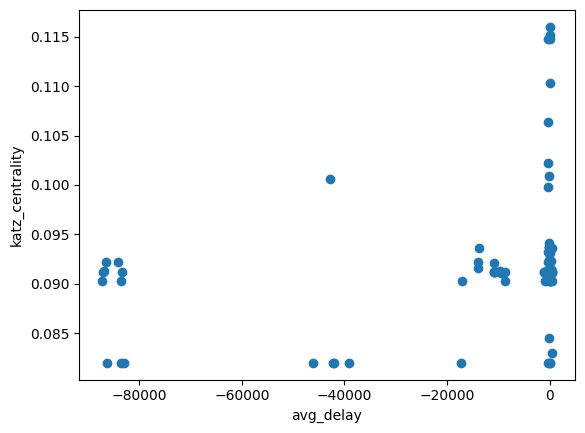

In [10]:
import pandas as pd

df = pd.DataFrame(list(zip(avg_delay.values(), katz_centrality.values())), columns=["avg_delay", "katz_centrality"])

# Calculate the correlation coefficient between the two variables
correlation = df["avg_delay"].corr(df["katz_centrality"])

# Print the correlation coefficient
print("Correlation Coefficient of avg_delay and katz centrality: " + str(correlation))

# Create a scatter plot of the two variables
plt.scatter(df["avg_delay"], df["katz_centrality"])
plt.xlabel("avg_delay")
plt.ylabel("katz_centrality")

# Show the plot
plt.show()